In [49]:
import warnings
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_excel('DS1_C4_S5_Car_Data_Challenge.xlsx')
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
      isker        Make      Model        Variant  Displacement  Cylinders  \
0         0        Tata  Nano Genx             Xt         624.0        2.0   
1         1        Tata  Nano Genx             Xe         624.0        2.0   
2         2        Tata  Nano Genx        Emax Xm         624.0        2.0   
3         3        Tata  Nano Genx            Xta         624.0        2.0   
4         4        Tata  Nano Genx             Xm         624.0        2.0   
...     ...         ...        ...            ...           ...        ...   
1271   1271       Honda       City   Vx Mt Diesel        1498.0        4.0   
1272   1272       Honda       City   Zx Mt Diesel        1498.0        4.0   
1273   1273       Honda       City  Zx Cvt Petrol        1497.0        4.0   
1274   1274       Honda       City   V Cvt Petrol        1497.0        4.0   
1275   1275  Mitsubishi    Montero         3.2 At        3200.0        4.0   

      Valves_Per_Cylinder

In [4]:
import os
os.system('pwd')

/Users/JDTilley/Downloads


0

In [8]:
df=df.fillna(0)
print(df)

      isker        Make      Model        Variant  Displacement  Cylinders  \
0         0        Tata  Nano Genx             Xt         624.0        2.0   
1         1        Tata  Nano Genx             Xe         624.0        2.0   
2         2        Tata  Nano Genx        Emax Xm         624.0        2.0   
3         3        Tata  Nano Genx            Xta         624.0        2.0   
4         4        Tata  Nano Genx             Xm         624.0        2.0   
...     ...         ...        ...            ...           ...        ...   
1271   1271       Honda       City   Vx Mt Diesel        1498.0        4.0   
1272   1272       Honda       City   Zx Mt Diesel        1498.0        4.0   
1273   1273       Honda       City  Zx Cvt Petrol        1497.0        4.0   
1274   1274       Honda       City   V Cvt Petrol        1497.0        4.0   
1275   1275  Mitsubishi    Montero         3.2 At        3200.0        4.0   

      Valves_Per_Cylinder               Drivetrain Cylinder_Con

In [20]:

Mean=[]
SD=[]
CV=[]

num_cols = ['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']

for col in num_cols:
    col_mean=df.loc[:,col].mean() 
    Mean.append(col_mean) 
    col_sd=df.loc[:,col].std() 
    SD.append(col_sd) 
    CV.append(col_sd/col_mean*100)  
    
row_head=['Mean','Standard Deviation','Coefficient of Variation']
col_names=['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']

make_data=pd.DataFrame([Mean, SD, CV],columns=col_names)

make_data.insert(0, "Measures", row_head, True)
print(make_data)

                   Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                      Mean   1841.323668                 49.300862   
1        Standard Deviation   1073.251243                 19.881987   
2  Coefficient of Variation     58.286941                 40.327869   

   City_Mileage_km_litre  Highway_Mileage_km_litre  Minimum_Turning_Radius  
0               8.936434                  6.296818                3.931889  
1              10.334368                  8.700834                2.867683  
2             115.643079                138.178266               72.933988  


In [18]:
cols = df.columns
for col in cols:
    print(col)

isker
Make
Model
Variant
Displacement
Cylinders
Valves_Per_Cylinder
Drivetrain
Cylinder_Configuration
Engine_Location
Fuel_System
Fuel_Tank_Capacity_litre
Fuel_Type
Height_mm
Length_mm
Width_mm
Body_Type
Doors
City_Mileage_km_litre
Highway_Mileage_km_litre
ARAI_Certified_Mileage
ARAI_Certified_Mileage_for_CNG
Kerb_Weight
Gears
Ground_Clearance
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Power_Seats
Keyless_Entry
Power
Torque
Odometer
Speedometer
Tachometer
Tripmeter
Seating_Capacity
Seats_Material
Type
Wheelbase
Wheels_Size
Start_/_Stop_Button
12v_Power_Outlet
Audiosystem
Aux-in_Compatibility
Average_Fuel_Consumption
Basic_Warranty
Bluetooth
Boot-lid_Opener
Boot_Space_litre
CD_/_MP3_/_DVD_Player
Central_Locking
Child_Safety_Locks
Clock
Cup_Holders
Distance_to_Empty
Door_Pockets
Engine_Malfunction_Light
Extended_Warranty
FM_Radio
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Low_

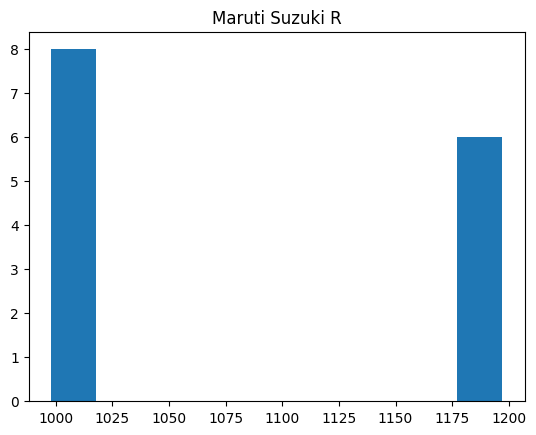

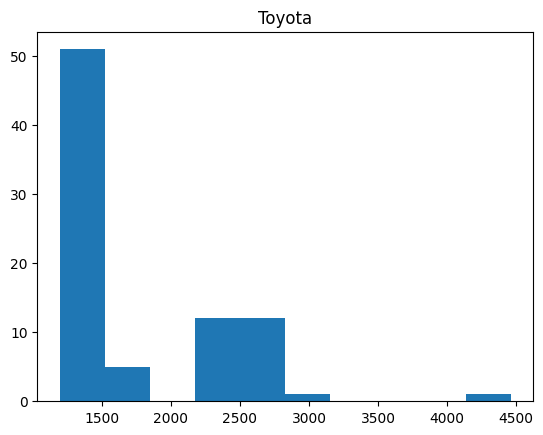

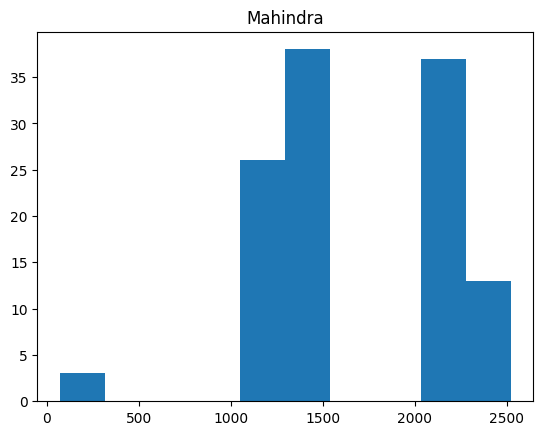

In [50]:
makes = ['Maruti Suzuki R', 'Toyota', 'Mahindra']

for make in makes:
    make_df = df.loc[df['Make'] == make]
    

    plt.hist(make_df['Displacement'])
    plt.title(make)
    plt.show()


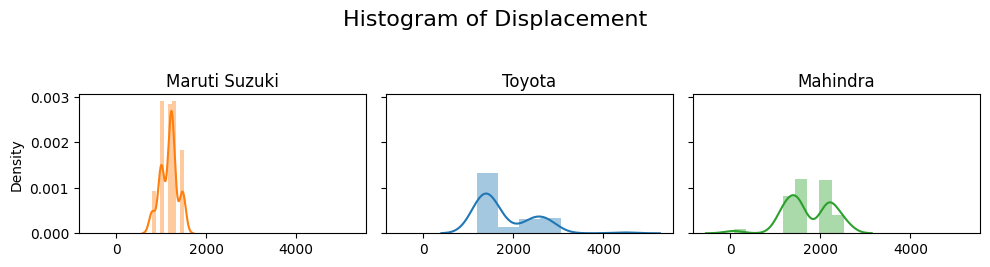

In [62]:
warnings.filterwarnings('ignore')

#Setting figure size and creating axes instance
fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)

#Creating a list of various colors for different company plots
colors = ['tab:orange', 'tab:blue', 'tab:green']

cols=['Maruti Suzuki', 'Toyota', 'Mahindra']

#Setting Chart title
plt.suptitle('Histogram of Displacement', y=1.05, size=16)

#Iterating each axes instance and company name
for i, (ax, col) in enumerate(zip(axes.flatten(), cols)):
    x = df.loc[df['Make'] == col, 'Displacement'].tolist() #Converting each column into list type
    sns.distplot(x, ax=axes[i], color=colors[i]) #Drawing histogram with density plot
    ax.set_title(col) #Setting company name as subtitle to each sub figure

#Compacting all 3 companies subplots
plt.tight_layout();

#Showing the final plot
plt.show()    


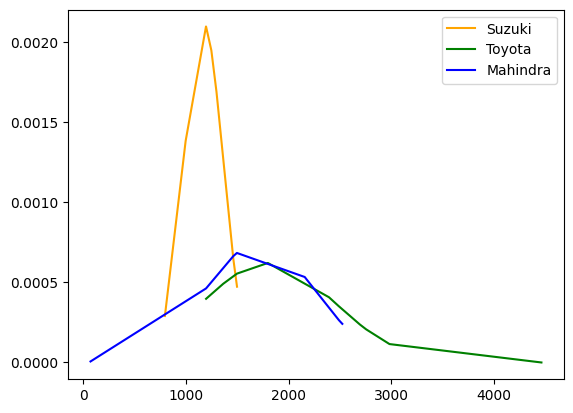

In [79]:
from scipy.stats import norm

#Sorting data
Suzuki_data=sorted(df.loc[df['Make'] == 'Maruti Suzuki', 'Displacement'].dropna().tolist())
Toyota_data=sorted(df.loc[df['Make'] == 'Toyota', 'Displacement'].dropna().tolist())
Mahindra_data=sorted(df.loc[df['Make'] == 'Mahindra', 'Displacement'].dropna().tolist())

# Calculating mean and standard deviation
S_mean = st.mean(Suzuki_data)
S_sd = st.stdev(Suzuki_data)
T_mean = st.mean(Toyota_data)
T_sd = st.stdev(Toyota_data)
M_mean = st.mean(Mahindra_data)
M_sd = st.stdev(Mahindra_data)

#Drawing plots using sorted data and normalized data
plt.plot(Suzuki_data, norm.pdf(Suzuki_data, S_mean, S_sd), color='orange', label='Suzuki')
plt.plot(Toyota_data, norm.pdf(Toyota_data, T_mean, T_sd),color='green', label='Toyota')
plt.plot(Mahindra_data, norm.pdf(Mahindra_data, M_mean, M_sd), color='blue', label='Mahindra')

#Attaching legend
plt.legend()

#Showing the final plot
plt.show()

In [80]:
from scipy.stats import kurtosis 

print("Kurtosis of 25 samples of Suzuki Displacement", kurtosis(Suzuki_data))
print("Kurtosis of 25 samples of Toyota Displacement", kurtosis(Toyota_data))
print("Kurtosis of 25 samples of Mahindra Displacement", kurtosis(Mahindra_data))

Kurtosis of 25 samples of Suzuki Displacement -0.46288680133638715
Kurtosis of 25 samples of Toyota Displacement 1.7853227242725271
Kurtosis of 25 samples of Mahindra Displacement 0.2862723778551697


In [76]:
len(df.loc[df['Make'] == 'Mahindra', 'Displacement'].dropna())

117